# Import Libraries

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("TRADES_CopyTr_90D_ROI.csv")

In [8]:
df

,Port_IDs,Trade_History
0,3925368433214965504,"[{'time': 1718899656000, 'symbol': 'SOLUSDT', ..."
1,4002413037164645377,"[{'time': 1718980078000, 'symbol': 'NEARUSDT',..."
2,3923766029921022977,"[{'time': 1718677164000, 'symbol': 'ETHUSDT', ..."
3,3994879592543698688,"[{'time': 1718678214000, 'symbol': 'ETHUSDT', ..."
4,3926423286576838657,"[{'time': 1718979615000, 'symbol': 'ETHUSDT', ..."
...,...,...
145,4000222729738650369,"[{'time': 1718982068000, 'symbol': 'ARKMUSDT',..."
146,3998659472131949824,"[{'time': 1718979385000, 'symbol': 'BTCUSDT', ..."
147,4028701921959171840,"[{'time': 1718984241000, 'symbol': 'BTCUSDT', ..."
148,4014818740371615232,"[{'time': 1718983357000, 'symbol': 'SOLUSDT', ..."


In [5]:
df['Trade_History']

0      [{'time': 1718899656000, 'symbol': 'SOLUSDT', ...
1      [{'time': 1718980078000, 'symbol': 'NEARUSDT',...
2      [{'time': 1718677164000, 'symbol': 'ETHUSDT', ...
3      [{'time': 1718678214000, 'symbol': 'ETHUSDT', ...
4      [{'time': 1718979615000, 'symbol': 'ETHUSDT', ...
                             ...                        
145    [{'time': 1718982068000, 'symbol': 'ARKMUSDT',...
146    [{'time': 1718979385000, 'symbol': 'BTCUSDT', ...
147    [{'time': 1718984241000, 'symbol': 'BTCUSDT', ...
148    [{'time': 1718983357000, 'symbol': 'SOLUSDT', ...
149    [{'time': 1718977395000, 'symbol': 'BNBUSDT', ...
Name: Trade_History, Length: 150, dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Port_IDs       150 non-null    int64 
 1   Trade_History  149 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.5+ KB


In [7]:
df.columns

Index(['Port_IDs', 'Trade_History'], dtype='object')

# Normalize the Trade_History column

In [28]:
import json
import ast

In [31]:
df['Trade_History'] = df['Trade_History'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_exploded = df.explode('Trade_History')
df_normalized = pd.json_normalize(df_exploded['Trade_History'])

# Step 5: Add the 'Port_IDs' to the flattened DataFrame
df_normalized['Port_IDs'] = df_exploded['Port_IDs'].reset_index(drop=True)

In [32]:
df_normalized.head()

,time,symbol,side,price,fee,feeAsset,quantity,quantityAsset,realizedProfit,realizedProfitAsset,baseAsset,qty,positionSide,activeBuy,Port_IDs
0,1.718900e+12,SOLUSDT,BUY,132.53700,-0.994027,USDT,1988.05500,USDT,0.0,USDT,SOL,15.0,LONG,True,3925368433214965504
1,1.718900e+12,DOGEUSDT,BUY,0.12182,-0.279796,USDT,1398.98088,USDT,0.0,USDT,DOGE,11484.0,LONG,False,3925368433214965504
2,1.718900e+12,DOGEUSDT,BUY,0.12182,-0.039494,USDT,197.47022,USDT,0.0,USDT,DOGE,1621.0,LONG,False,3925368433214965504
3,1.718900e+12,DOGEUSDT,BUY,0.12182,-0.008284,USDT,16.56752,USDT,0.0,USDT,DOGE,136.0,LONG,True,3925368433214965504
4,1.718900e+12,DOGEUSDT,BUY,0.12182,-0.046109,USDT,92.21774,USDT,0.0,USDT,DOGE,757.0,LONG,True,3925368433214965504


# Save the final result to a CSV file

In [33]:
df_normalized.to_csv('expanded_trade_history.csv', index=False)

# Load Udated CSV file

In [34]:
new_df = pd.read_csv('expanded_trade_history.csv')
new_df

,time,symbol,side,price,fee,feeAsset,quantity,quantityAsset,realizedProfit,realizedProfitAsset,baseAsset,qty,positionSide,activeBuy,Port_IDs
0,1.718900e+12,SOLUSDT,BUY,132.537000,-0.994027,USDT,1988.055000,USDT,0.0,USDT,SOL,15.0,LONG,True,3925368433214965504
1,1.718900e+12,DOGEUSDT,BUY,0.121820,-0.279796,USDT,1398.980880,USDT,0.0,USDT,DOGE,11484.0,LONG,False,3925368433214965504
2,1.718900e+12,DOGEUSDT,BUY,0.121820,-0.039494,USDT,197.470220,USDT,0.0,USDT,DOGE,1621.0,LONG,False,3925368433214965504
3,1.718900e+12,DOGEUSDT,BUY,0.121820,-0.008284,USDT,16.567520,USDT,0.0,USDT,DOGE,136.0,LONG,True,3925368433214965504
4,1.718900e+12,DOGEUSDT,BUY,0.121820,-0.046109,USDT,92.217740,USDT,0.0,USDT,DOGE,757.0,LONG,True,3925368433214965504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211273,1.718550e+12,JASMYUSDT,SELL,0.035968,-0.025070,USDT,50.139392,USDT,0.0,USDT,JASMY,1394.0,BOTH,False,3768170840939476993
211274,1.718550e+12,JASMYUSDT,SELL,0.035968,-0.008255,USDT,16.509312,USDT,0.0,USDT,JASMY,459.0,BOTH,False,3768170840939476993
211275,1.718550e+12,JASMYUSDT,SELL,0.035969,-0.031545,USDT,63.089626,USDT,0.0,USDT,JASMY,1754.0,BOTH,False,3768170840939476993
211276,1.718550e+12,JASMYUSDT,SELL,0.035969,-0.031905,USDT,63.809006,USDT,0.0,USDT,JASMY,1774.0,BOTH,False,3768170840939476993


In [37]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211278 entries, 0 to 211277
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 211277 non-null  float64
 1   symbol               211277 non-null  object 
 2   side                 211277 non-null  object 
 3   price                211277 non-null  float64
 4   fee                  211277 non-null  float64
 5   feeAsset             211277 non-null  object 
 6   quantity             211277 non-null  float64
 7   quantityAsset        211277 non-null  object 
 8   realizedProfit       211277 non-null  float64
 9   realizedProfitAsset  211277 non-null  object 
 10  baseAsset            211277 non-null  object 
 11  qty                  211277 non-null  float64
 12  positionSide         211277 non-null  object 
 13  activeBuy            211277 non-null  object 
 14  Port_IDs             211278 non-null  int64  
dtypes: float64(6), in

In [38]:
new_df.describe()

,time,price,fee,quantity,realizedProfit,qty,Port_IDs
count,2.112770e+05,211277.000000,211277.000000,211277.000000,211277.000000,2.112770e+05,2.112780e+05
mean,1.717434e+12,4129.040315,-0.382787,975.509483,3.270818,1.090626e+04,3.964346e+18
std,1.351340e+09,15363.534288,1.793858,4667.098916,57.895095,1.562781e+05,6.102591e+16
min,1.713804e+12,0.000158,-120.458652,0.006694,-3269.194444,1.000000e-03,3.672755e+18
25%,1.716470e+12,0.143830,-0.179868,23.340915,0.000000,2.000000e+00,3.942631e+18
50%,1.717761e+12,2.483300,-0.051732,127.775000,0.000000,2.600000e+01,3.977117e+18
75%,1.718640e+12,44.621000,-0.009454,404.012000,0.577590,5.790000e+02,4.011627e+18
max,1.718990e+12,72105.000000,0.000000,602293.260000,8186.254058,2.100000e+07,4.041860e+18


# Check missing value and drop missing value

In [39]:
new_df.isna().sum()

time                   1
symbol                 1
side                   1
price                  1
fee                    1
feeAsset               1
quantity               1
quantityAsset          1
realizedProfit         1
realizedProfitAsset    1
baseAsset              1
qty                    1
positionSide           1
activeBuy              1
Port_IDs               0
dtype: int64

In [43]:
new_df.dropna(inplace=True)
new_df.isna().sum()

time                   0
symbol                 0
side                   0
price                  0
fee                    0
feeAsset               0
quantity               0
quantityAsset          0
realizedProfit         0
realizedProfitAsset    0
baseAsset              0
qty                    0
positionSide           0
activeBuy              0
Port_IDs               0
dtype: int64

# Check the duplicate Value

In [44]:
new_df.duplicated().sum()

11251

In [45]:
new_df.shape

(211277, 15)

# Drop the Duplicate Value

In [46]:
new_df.drop_duplicates(inplace=True)
new_df.shape

(200026, 15)

In [47]:
new_df

,time,symbol,side,price,fee,feeAsset,quantity,quantityAsset,realizedProfit,realizedProfitAsset,baseAsset,qty,positionSide,activeBuy,Port_IDs
0,1.718900e+12,SOLUSDT,BUY,132.537000,-0.994027,USDT,1988.055000,USDT,0.0,USDT,SOL,15.0,LONG,True,3925368433214965504
1,1.718900e+12,DOGEUSDT,BUY,0.121820,-0.279796,USDT,1398.980880,USDT,0.0,USDT,DOGE,11484.0,LONG,False,3925368433214965504
2,1.718900e+12,DOGEUSDT,BUY,0.121820,-0.039494,USDT,197.470220,USDT,0.0,USDT,DOGE,1621.0,LONG,False,3925368433214965504
3,1.718900e+12,DOGEUSDT,BUY,0.121820,-0.008284,USDT,16.567520,USDT,0.0,USDT,DOGE,136.0,LONG,True,3925368433214965504
4,1.718900e+12,DOGEUSDT,BUY,0.121820,-0.046109,USDT,92.217740,USDT,0.0,USDT,DOGE,757.0,LONG,True,3925368433214965504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211273,1.718550e+12,JASMYUSDT,SELL,0.035968,-0.025070,USDT,50.139392,USDT,0.0,USDT,JASMY,1394.0,BOTH,False,3768170840939476993
211274,1.718550e+12,JASMYUSDT,SELL,0.035968,-0.008255,USDT,16.509312,USDT,0.0,USDT,JASMY,459.0,BOTH,False,3768170840939476993
211275,1.718550e+12,JASMYUSDT,SELL,0.035969,-0.031545,USDT,63.089626,USDT,0.0,USDT,JASMY,1754.0,BOTH,False,3768170840939476993
211276,1.718550e+12,JASMYUSDT,SELL,0.035969,-0.031905,USDT,63.809006,USDT,0.0,USDT,JASMY,1774.0,BOTH,False,3768170840939476993


In [49]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200026 entries, 0 to 211277
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 200026 non-null  float64
 1   symbol               200026 non-null  object 
 2   side                 200026 non-null  object 
 3   price                200026 non-null  float64
 4   fee                  200026 non-null  float64
 5   feeAsset             200026 non-null  object 
 6   quantity             200026 non-null  float64
 7   quantityAsset        200026 non-null  object 
 8   realizedProfit       200026 non-null  float64
 9   realizedProfitAsset  200026 non-null  object 
 10  baseAsset            200026 non-null  object 
 11  qty                  200026 non-null  float64
 12  positionSide         200026 non-null  object 
 13  activeBuy            200026 non-null  object 
 14  Port_IDs             200026 non-null  int64  
dtypes: float64(6), int64(1

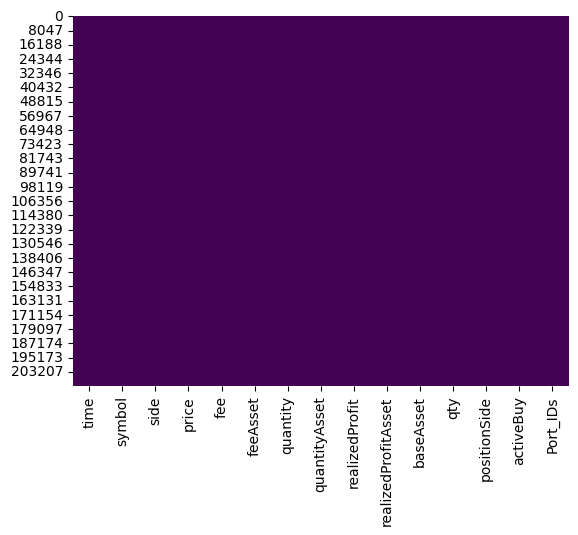

In [51]:
sns.heatmap(new_df.isnull(), cbar=False, cmap='viridis')
plt.show()

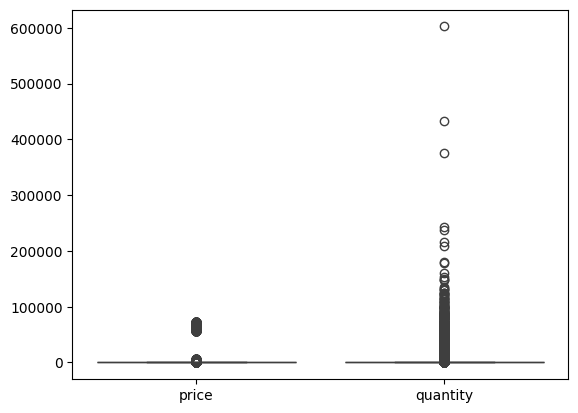

In [53]:
# Visualize distribution of key columns (e.g., price, quantity) to detect outliers
sns.boxplot(data=new_df[['price', 'quantity']])
plt.show()

In [ ]:
# Option 1: Remove outliers based on standard deviation
df_no_outliers = df[(df['price'] < df['price'].mean() + 3 * df['price'].std()) & 
                    (df['price'] > df['price'].mean() - 3 * df['price'].std())]

# Option 2: Remove outliers using IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[~((df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR)))]


In [55]:
new_df.columns

Index(['time', 'symbol', 'side', 'price', 'fee', 'feeAsset', 'quantity',
       'quantityAsset', 'realizedProfit', 'realizedProfitAsset', 'baseAsset',
       'qty', 'positionSide', 'activeBuy', 'Port_IDs'],
      dtype='object')

In [56]:
# Example: Creating a new 'position' column
def classify_position(row):
    if row['side'] == 'BUY' and row['positionSide'] == 'LONG':
        return 'long_open'
    elif row['side'] == 'SELL' and row['positionSide'] == 'LONG':
        return 'long_close'
    elif row['side'] == 'BUY' and row['positionSide'] == 'SHORT':
        return 'short_open'
    elif row['side'] == 'SELL' and row['positionSide'] == 'SHORT':
        return 'short_close'
    else:
        return 'other'

new_df['position'] = new_df.apply(classify_position, axis=1)


In [57]:
new_df

,time,symbol,side,price,fee,feeAsset,quantity,quantityAsset,realizedProfit,realizedProfitAsset,baseAsset,qty,positionSide,activeBuy,Port_IDs,position
0,1.718900e+12,SOLUSDT,BUY,132.537000,-0.994027,USDT,1988.055000,USDT,0.0,USDT,SOL,15.0,LONG,True,3925368433214965504,long_open
1,1.718900e+12,DOGEUSDT,BUY,0.121820,-0.279796,USDT,1398.980880,USDT,0.0,USDT,DOGE,11484.0,LONG,False,3925368433214965504,long_open
2,1.718900e+12,DOGEUSDT,BUY,0.121820,-0.039494,USDT,197.470220,USDT,0.0,USDT,DOGE,1621.0,LONG,False,3925368433214965504,long_open
3,1.718900e+12,DOGEUSDT,BUY,0.121820,-0.008284,USDT,16.567520,USDT,0.0,USDT,DOGE,136.0,LONG,True,3925368433214965504,long_open
4,1.718900e+12,DOGEUSDT,BUY,0.121820,-0.046109,USDT,92.217740,USDT,0.0,USDT,DOGE,757.0,LONG,True,3925368433214965504,long_open
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211273,1.718550e+12,JASMYUSDT,SELL,0.035968,-0.025070,USDT,50.139392,USDT,0.0,USDT,JASMY,1394.0,BOTH,False,3768170840939476993,other
211274,1.718550e+12,JASMYUSDT,SELL,0.035968,-0.008255,USDT,16.509312,USDT,0.0,USDT,JASMY,459.0,BOTH,False,3768170840939476993,other
211275,1.718550e+12,JASMYUSDT,SELL,0.035969,-0.031545,USDT,63.089626,USDT,0.0,USDT,JASMY,1754.0,BOTH,False,3768170840939476993,other
211276,1.718550e+12,JASMYUSDT,SELL,0.035969,-0.031905,USDT,63.809006,USDT,0.0,USDT,JASMY,1774.0,BOTH,False,3768170840939476993,other


In [61]:
new_df['side'].value_counts()

side
BUY     101457
SELL     98569
Name: count, dtype: int64

# ROI (Return on Investment):
1. ROI= Initial Investment / Net Prof

In [62]:
new_df['ROI'] = new_df['realizedProfit'] / new_df['quantity']

# PnL (Profit and Loss): 
1. this is already given as realizedProfit.

In [67]:
# Group by Port_ID and sum realizedProfit
pnl_per_account = new_df.groupby('Port_IDs')['realizedProfit'].sum().reset_index(name='PnL')


In [70]:
pnl_per_account

,Port_IDs,PnL
0,3672754654734989568,565.547761
1,3733192481840423936,2653.591900
2,3768170840939476993,243.668899
3,3784403294629753856,2493.618898
4,3786761687746711808,170.220200
...,...,...
144,4039279455324236544,1023.498387
145,4040382575336130560,0.000000
146,4040843843196854529,2043.478100
147,4041804592937345281,-796.682686


# Sharpe Ratio:
1. Sharpe Ratio =(Mean of ROI)−(Risk-free Rate) / Standard Deviation of ROI
2. Assume the risk-free rate is 0 for simplicity:

In [68]:
new_df['mean_ROI'] = new_df.groupby('Port_IDs')['ROI'].transform('mean')
new_df['std_ROI'] = new_df.groupby('Port_IDs')['ROI'].transform('std')
new_df['Sharpe_Ratio'] = new_df['mean_ROI'] / new_df['std_ROI']


In [69]:
new_df['Sharpe_Ratio']

0         0.506249
1         0.506249
2         0.506249
3         0.506249
4         0.506249
            ...   
211273    0.834517
211274    0.834517
211275    0.834517
211276    0.834517
211277    0.834517
Name: Sharpe_Ratio, Length: 200026, dtype: float64

# Maximum Drawdown (MDD): 
1. This measures the largest drop from peak to trough in the account's equity curve. First, create a cumulative profit curve, then find the maximum        drawdown.

In [75]:
new_df['cumulative_profit'] = new_df.groupby('Port_IDs')['realizedProfit'].cumsum()

def calculate_mdd(cumulative_profit):
    peak = cumulative_profit.cummax()
    drawdown = cumulative_profit - peak
    return drawdown.min()

new_df['MDD'] = new_df.groupby('Port_IDs')['cumulative_profit'].transform(calculate_mdd)


In [79]:
calculate_mdd(new_df['cumulative_profit'])

0        -158.979514
1        -158.979514
2        -158.979514
3        -158.979514
4        -158.979514
             ...    
211273      0.000000
211274      0.000000
211275      0.000000
211276      0.000000
211277      0.000000
Name: MDD, Length: 200026, dtype: float64

# Win Rate: 
1. The win rate is the percentage of profitable positions out of total positions

In [80]:
new_df['is_win'] = new_df['realizedProfit'] > 0
win_rate_per_account = new_df.groupby('Port_IDs')['is_win'].mean().reset_index(name='Win_Rate')


In [83]:
win_rate_per_account

,Port_IDs,Win_Rate
0,3672754654734989568,0.446855
1,3733192481840423936,0.781197
2,3768170840939476993,0.428571
3,3784403294629753856,0.302932
4,3786761687746711808,0.430380
...,...,...
144,4039279455324236544,0.551613
145,4040382575336130560,0.000000
146,4040843843196854529,0.270833
147,4041804592937345281,0.227273


# Win Positions and Total Positions: 
1. Calculate the total number of winning and overall positions for each account.

In [85]:
win_positions_per_account = new_df.groupby('Port_IDs')['is_win'].sum().reset_index(name='Win_Positions')
total_positions_per_account = new_df.groupby('Port_IDs').size().reset_index(name='Total_Positions')

In [86]:
win_positions_per_account

,Port_IDs,Win_Positions
0,3672754654734989568,206
1,3733192481840423936,457
2,3768170840939476993,6
3,3784403294629753856,1767
4,3786761687746711808,34
...,...,...
144,4039279455324236544,171
145,4040382575336130560,0
146,4040843843196854529,13
147,4041804592937345281,75


In [87]:
total_positions_per_account

,Port_IDs,Total_Positions
0,3672754654734989568,461
1,3733192481840423936,585
2,3768170840939476993,14
3,3784403294629753856,5833
4,3786761687746711808,79
...,...,...
144,4039279455324236544,310
145,4040382575336130560,70
146,4040843843196854529,48
147,4041804592937345281,330


# Merge the calculated metrics

In [88]:
df_metrics = pd.merge(pnl_per_account, win_rate_per_account, on='Port_IDs')
df_metrics = pd.merge(df_metrics, win_positions_per_account, on='Port_IDs')
df_metrics = pd.merge(df_metrics, total_positions_per_account, on='Port_IDs')

# Additional metrics (Sharpe Ratio, MDD, etc.) can also be merged


In [90]:
df_metrics

,Port_IDs,PnL,Win_Rate,Win_Positions,Total_Positions
0,3672754654734989568,565.547761,0.446855,206,461
1,3733192481840423936,2653.591900,0.781197,457,585
2,3768170840939476993,243.668899,0.428571,6,14
3,3784403294629753856,2493.618898,0.302932,1767,5833
4,3786761687746711808,170.220200,0.430380,34,79
...,...,...,...,...,...
144,4039279455324236544,1023.498387,0.551613,171,310
145,4040382575336130560,0.000000,0.000000,0,70
146,4040843843196854529,2043.478100,0.270833,13,48
147,4041804592937345281,-796.682686,0.227273,75,330


# Save the Data: 
1. Export the final dataset with all metrics to a CSV

In [91]:
df_metrics.to_csv('final_metrics.csv', index=False)

In [93]:
data =pd.read_csv("final_metrics.csv")
data

,Port_IDs,PnL,Win_Rate,Win_Positions,Total_Positions
0,3672754654734989568,565.547761,0.446855,206,461
1,3733192481840423936,2653.591900,0.781197,457,585
2,3768170840939476993,243.668899,0.428571,6,14
3,3784403294629753856,2493.618898,0.302932,1767,5833
4,3786761687746711808,170.220200,0.430380,34,79
...,...,...,...,...,...
144,4039279455324236544,1023.498387,0.551613,171,310
145,4040382575336130560,0.000000,0.000000,0,70
146,4040843843196854529,2043.478100,0.270833,13,48
147,4041804592937345281,-796.682686,0.227273,75,330


In [94]:
data.isna().sum()

Port_IDs           0
PnL                0
Win_Rate           0
Win_Positions      0
Total_Positions    0
dtype: int64

In [95]:
data.duplicated().sum()

0

# Step 3: Ranking Algorithm

## Calculate Scores for Each Metric

In [127]:
new_df.isna().sum()

time                        0
symbol                      0
side                        0
price                       0
fee                         0
feeAsset                    0
quantity                    0
quantityAsset               0
realizedProfit              0
realizedProfitAsset         0
baseAsset                   0
qty                         0
positionSide                0
activeBuy                   0
Port_IDs                    0
position                    0
ROI                         0
mean_ROI                    0
std_ROI                     0
Sharpe_Ratio               70
cumulative_profit           0
MDD                         0
is_win                      0
PnL                    199886
Win_Rate               199886
final_score            199886
rank                   199886
dtype: int64

In [130]:
new_df.dropna(inplace=True)

In [133]:
new_df.isna().sum()

time                   0
symbol                 0
side                   0
price                  0
fee                    0
feeAsset               0
quantity               0
quantityAsset          0
realizedProfit         0
realizedProfitAsset    0
baseAsset              0
qty                    0
positionSide           0
activeBuy              0
Port_IDs               0
position               0
ROI                    0
mean_ROI               0
std_ROI                0
Sharpe_Ratio           0
cumulative_profit      0
MDD                    0
is_win                 0
PnL                    0
Win_Rate               0
final_score            0
rank                   0
dtype: int64

In [128]:
new_df.duplicated().sum()

0

In [134]:
from sklearn.preprocessing import MinMaxScaler

# we have already have ROI, PnL, Sharpe Ratio, MDD, Win Rate calculated
metrics = ['ROI', 'PnL', 'Sharpe_Ratio', 'MDD', 'Win_Rate']

scaler = MinMaxScaler()

# Scale the metrics between 0 and 1
new_df[metrics] = scaler.fit_transform(new_df[metrics])

# Assign weights to each metric
weights = {
    'ROI': 0.30,
    'PnL': 0.25,
    'Sharpe_Ratio': 0.20,
    'MDD': 0.15,
    'Win_Rate': 0.10
}

# Calculate final score for each account
new_df['final_score'] = (new_df['ROI'] * weights['ROI'] +
                     new_df['PnL'] * weights['PnL'] +
                     new_df['Sharpe_Ratio'] * weights['Sharpe_Ratio'] +
                     new_df['MDD'] * weights['MDD'] +
                     new_df['Win_Rate'] * weights['Win_Rate'])


In [115]:
new_df['rank'] = new_df['final_score'].rank(ascending=False)
new_df = new_df.sort_values(by='final_score', ascending=False)


# Select the top 20 accounts

In [137]:
top_20_accounts = new_df[['Port_IDs', 'rank']].sort_values(by='rank', ascending=False).head(20)

In [138]:
top_20_accounts

,Port_IDs,rank
71,3925368433214965504,140.0
145,3925368433214965504,139.0
119,3925368433214965504,138.0
111,3925368433214965504,137.0
122,3925368433214965504,136.0
81,3925368433214965504,135.0
110,3925368433214965504,134.0
113,3925368433214965504,133.0
102,3925368433214965504,132.0
103,3925368433214965504,131.0


# Export top 20 accounts

In [141]:
top_20_accounts.to_csv('top_20_accounts.csv', index=False)